## Week 10: Decision Trees

```
- Machine Learning, Innopolis University (Fall semester 2024)
- Instructors: Adil Khan & Gcinizwe Dlamini
```
<hr>


```
Lab Plan
1. Decision Trees:
    - Visualize DT
    - Gini, entropy
    - Information Gain
    - Regression Trees
    
2. Comparison between models
    - Linearly Seperable
    - Boolean XOR
    - Moons
    - Circles
```

<hr>

In [32]:
%cd /home/luzinsan/Documents/Obsidian/ML/Innopolis/material/1 semester/Machine Learning/Labs/lab10/

/home/luzinsan/Documents/Obsidian/ML/Innopolis/material/1 semester/Machine Learning/Labs/lab10


/home/luzinsan/.cache/pypoetry/virtualenvs/classic-ml-scKRehVl-py3.11/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


![](https://i0.wp.com/why-change.com/wp-content/uploads/2021/11/Decision-Tree-elements-2.png?resize=715%2C450&ssl=1)

## 1. Decision Trees
### Recap

1.  What do leaves and branches represent in Decision trees?
2. When do we stop splitting the tree?
3. What is Entropy?
4. What is Information Gain?


The dataset that we will work on is the same dataset that we saw before which is Iris image calssification.

In [2]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text
from sklearn import tree
import pandas as pd

iris = datasets.load_iris()
X = iris['data']
y = iris['target']


pd.DataFrame(iris.data,columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X, y)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



## Visualize decision tree with Graphviz

### What is Graphviz?

Now let's see what kind of trees can we build with Sklearn. Then visualize with graphviz

Troubleshooting :

`Linux` : make sure that you have graphviz installed through terminal using `sudo apt-get install graphviz`
`Mac` : install through terminal using `brew install graphviz`

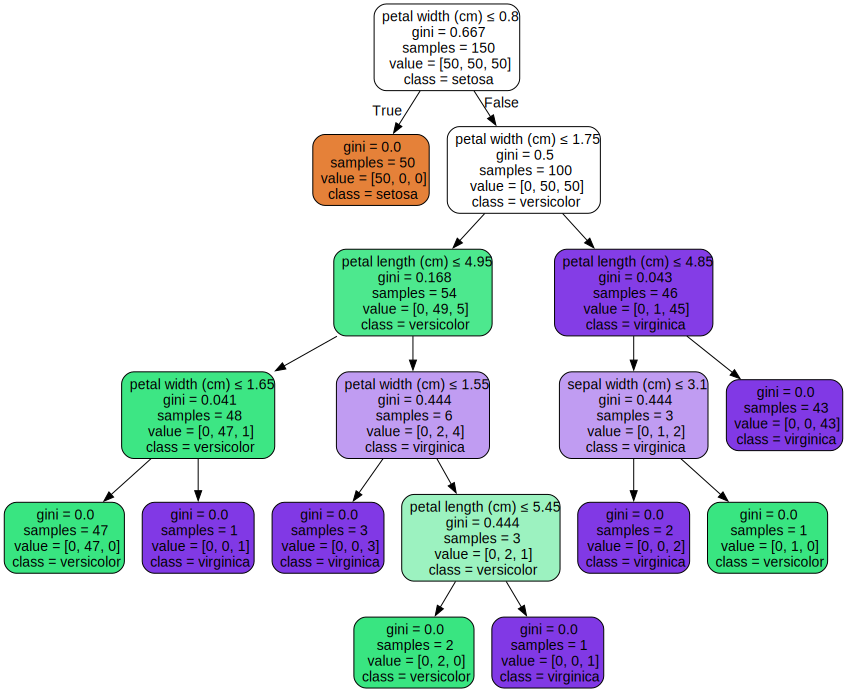

In [7]:
import graphviz
def plot_tree(clf):
    dot_data = tree.export_graphviz(clf, out_file=None,
                                    feature_names=iris.feature_names,
                                    class_names=iris.target_names,
                                    filled=True, rounded=True,
                                    special_characters=True)
    return graphviz.Source(dot_data)

graph = plot_tree(decision_tree)
graph

## Measures for Impurity

Let's use a smaller Decision Tree and try to recreate some values on it.

<table><tr>
<td> <img src="https://miro.medium.com/max/565/1*M15RZMSk8nGEyOnD8haF-A.png" alt="" style="width: 500px;"/> </td>
<td> <img src="https://qph.fs.quoracdn.net/main-qimg-93d3fa675b807bc505ef905c828d6c6d" alt="" style="width: 500px;"/> </td>
</tr></table>

<strong>Calculate the gini and entropy of the second branch (Petal width (cm) <= 1.75)</strong>

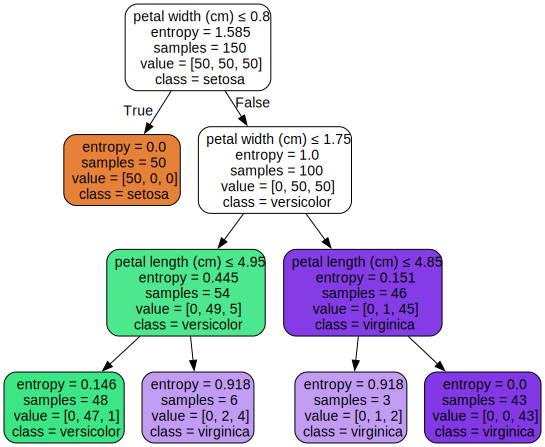

In [9]:
decision_tree = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
decision_tree = decision_tree.fit(X, y)
plot_tree(decision_tree)

## Calculation of Gini index & Entropy

**Gini index** measures the inequality among values and is calculated as
$$1 - \sum{p_i^{2}}$$
where $p_i$ is the proportion of a class.<br><br>

**Entropy measures** the uncertainty or randomness of the values and is calculated as
$$-\sum{p_i \text{log} (p_i)}$$

In [21]:
p = [counts / len(values) for counts in np.unique_counts(values).counts]
p

[np.float64(0.6666666666666666), np.float64(0.3333333333333333)]

In [23]:
import numpy as np
from collections import Counter

def gini(values):
    """Calculate the Gini index for an array of values."""
    # TODO: Calculate the Gini index
    p = [counts / len(values) for counts in np.unique_counts(values).counts]
    gini_index = 1 - np.sum(np.pow(p, 2))
    return gini_index



def gini_sol_in_class(values):
    # other solution
    total = len(values)
    counts = Counter(values)
    probs = [count / total for count in counts.values()]
    gini_intex = 1 - sum(p ** 2 for p in probs)
    return gini_intex

def entropy(values):
    """Calculate the entropy for an array of values."""
    # TODO: Calculate the entropy
    p = [counts / len(values) for counts in np.unique_counts(values).counts]
    entropy_value = 1 - np.sum(p * np.log2(p))
    return entropy_value

def entropy_sol_in_class(values):
    # other solution
    total = len(values)
    counts = Counter(values)
    probs = [count / total for count in counts.values()]
    entropy_value = 1 - sum(p * np.log2(p) for p in probs if p > 0)
    return entropy_value

values = np.array([10, 10, 50, 10, 50, 10])
np.unique_counts(values)
print("Gini: {:.03f}, Entropy: {:.04f}".format(gini(values), entropy(values)))


Gini: 0.444, Entropy: 1.9183


## Calculation of Information Gain

In [28]:
def information_gain(parent, children):
    """Calculate the information gain from splitting parent into children."""
    total = parent.sum()
    # Entropy of the parent node
    parent_entropy = entropy(parent)

    # Weighted entropy of the child nodes
    weighted_child_entropy = 0
    for child in children:
        child_weight = child.sum() / total
        weighted_child_entropy += child_weight * entropy(child)

    # Information gain is the difference between parent entropy and weighted child entropy
    info_gain = parent_entropy - weighted_child_entropy
    return info_gain

# Example usage
parent = np.array([50, 50, 50])
children = np.array([[50, 0, 0], [0, 50, 50]])

ig = information_gain(parent, children)
print("Information gain: {:.03f}".format(ig))

Information gain: -0.918


## Regression Trees

Basic Concept:
* Split the data as before.
* To minimize the variance of the leaf node values.
* Take the mean as the prediction


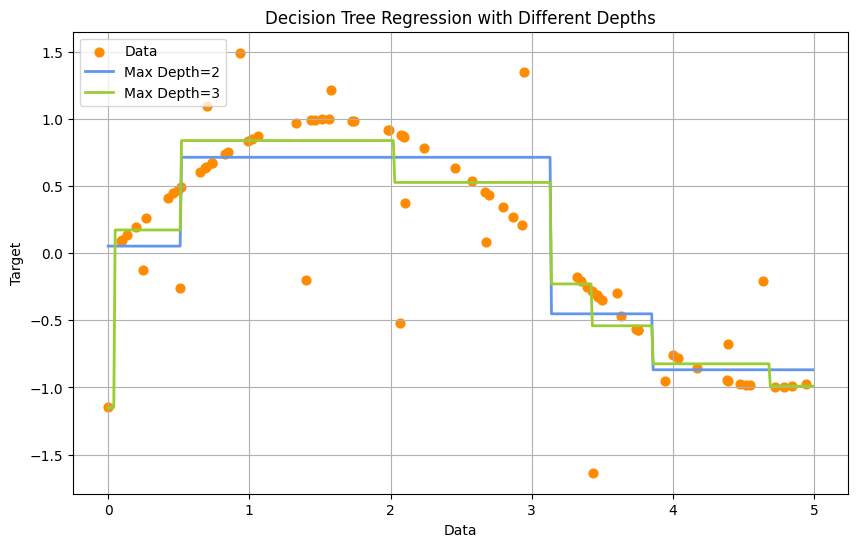

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to every 5th point
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression models
regr_1 = DecisionTreeRegressor(max_depth=2)
depth2 = 3
regr_2 = DecisionTreeRegressor(max_depth=depth2)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict on test data
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=40, color="darkorange", label="Data")
plt.plot(X_test, y_1, color="cornflowerblue", label="Max Depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label=f"Max Depth={depth2}", linewidth=2)

# Labeling and visual tweaks
plt.xlabel("Data")
plt.ylabel("Target")
plt.title("Decision Tree Regression with Different Depths")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


# 2. Comparison Between models
Now that you know multiple types of classifiers:
1. Linear
  * Logistic Regression
  * SVM-(with linear kernel)
2. Non-Linear
  * SVM-(with non linear kernel)
  * Decision Trees
  
Let's take a look how their decision boundaries look like.

## Comparison on iris dataset

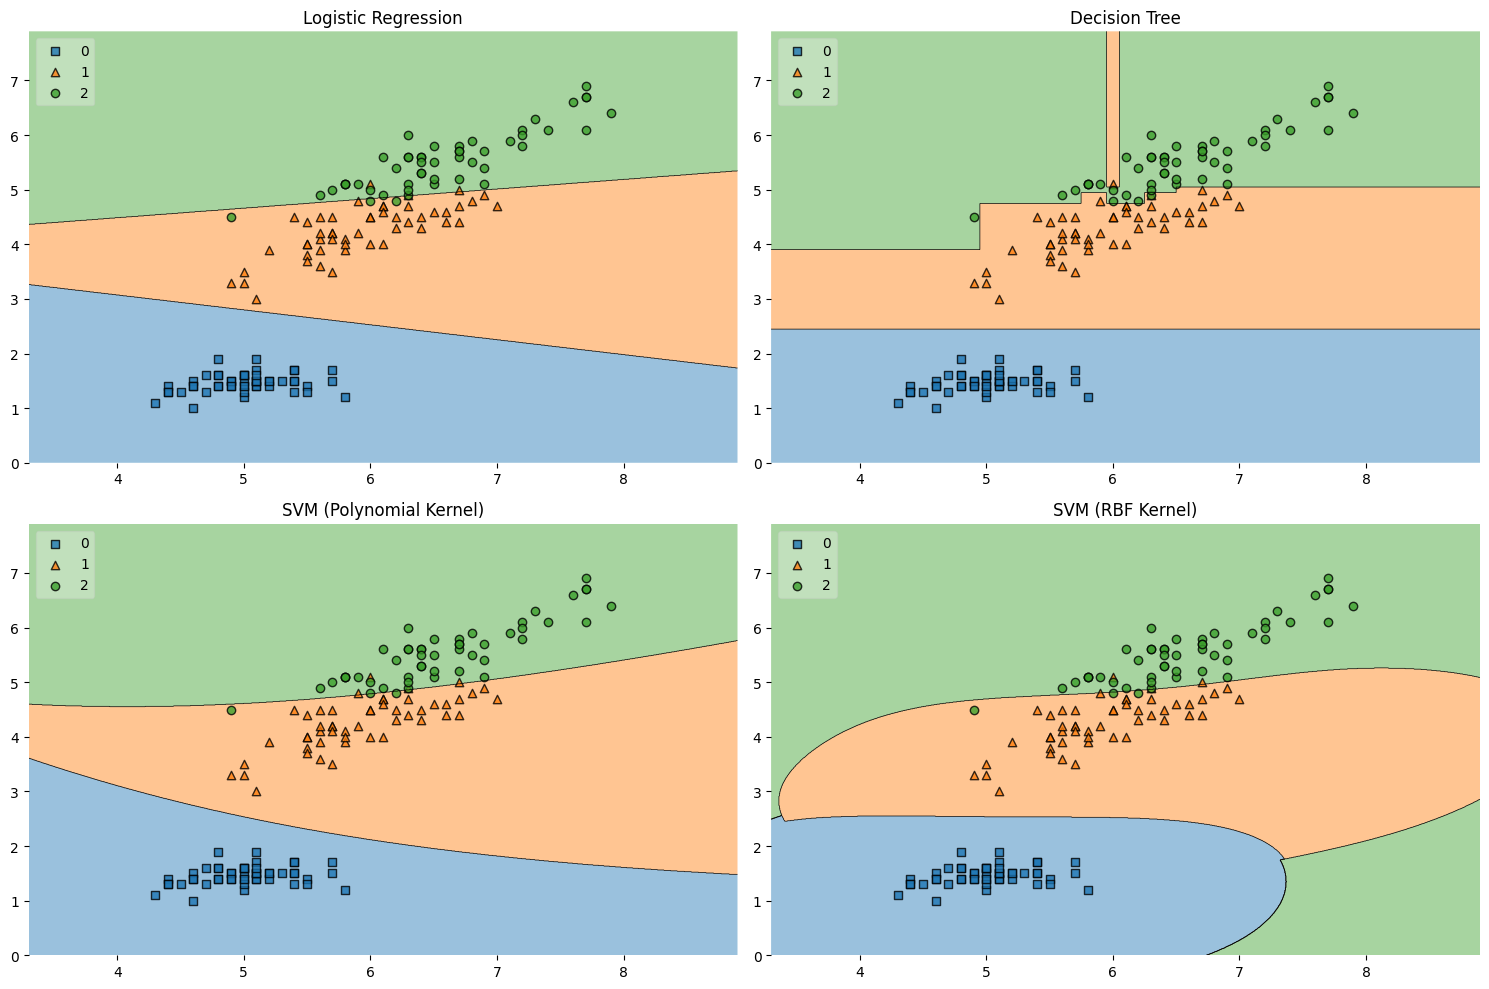

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]  # Using features for plotting
y = iris.target
clf1, clf2, clf3, clf4 = None, None,None,None

def compare_models(X, y):
    # Initializing classifiers
    random_state = 42
    clf1 = LogisticRegression(random_state=random_state, solver='newton-cg')
    clf2 = DecisionTreeClassifier(random_state=random_state, max_depth=7)
    clf3 = SVC(kernel='poly', degree=3, random_state=random_state)
    clf4 = SVC(kernel='rbf', gamma='auto', random_state=random_state)

    # Creating a grid layout for plots
    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure(figsize=(15, 10))

    # Classifier labels
    labels = ['Logistic Regression', 'Decision Tree', 'SVM (Polynomial Kernel)', 'SVM (RBF Kernel)']

    # Loop over classifiers, labels, and grid positions
    for clf, label, grd in zip([clf1, clf2, clf3, clf4],
                               labels,
                               itertools.product([0, 1], repeat=2)):
        # Fit classifier
        clf.fit(X, y)

        # Plot decision regions
        ax = plt.subplot(gs[grd[0], grd[1]])
        plot_decision_regions(X, y, clf=clf, legend=2, ax=ax)
        plt.title(label)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

# Call the function to compare models
compare_models(X, y)


## Comparison on logical_xor

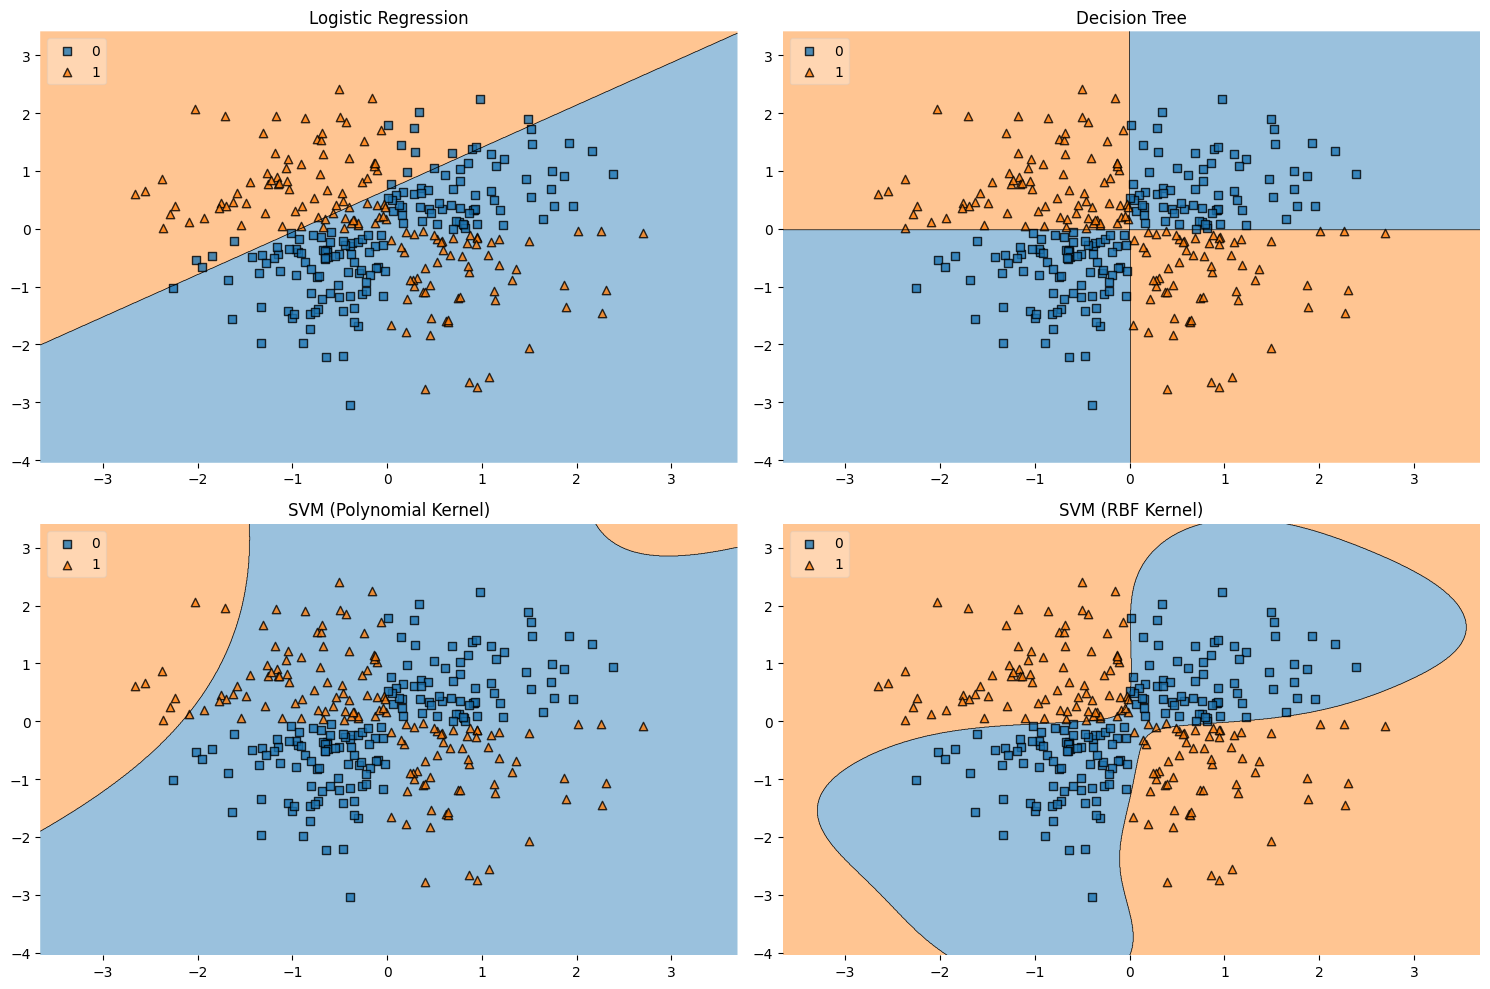

In [36]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0),
             dtype=int)

compare_models(X,y)

## Comparison on Moons data

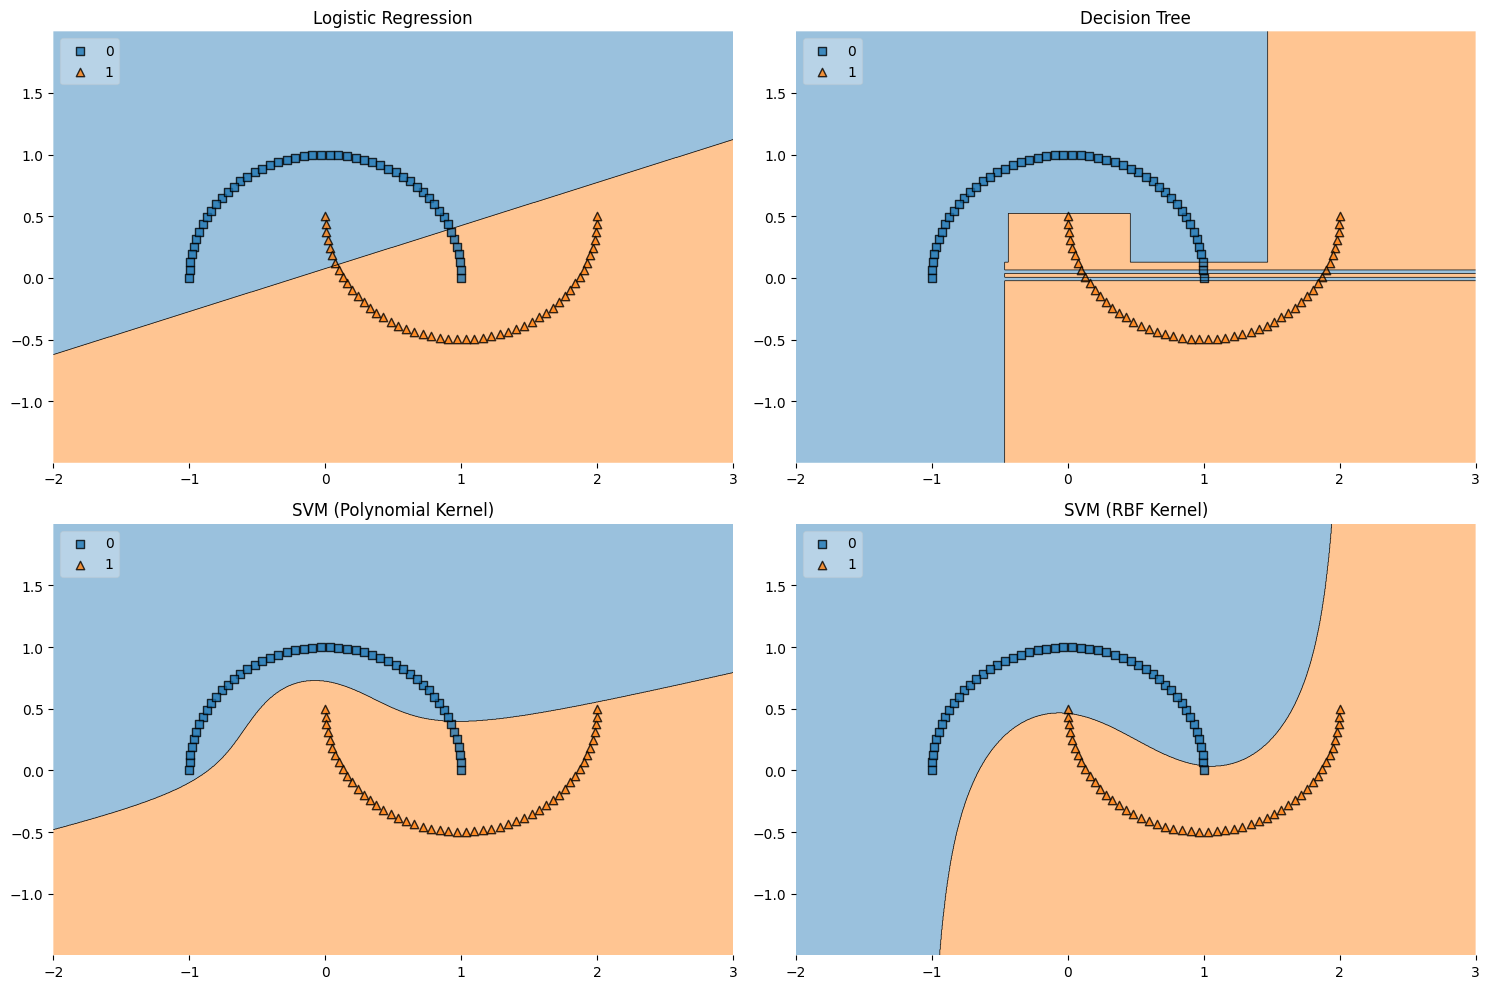

In [45]:
X, y = datasets.make_moons(n_samples=100, random_state=123)

compare_models(X,y)

## Comparison on Circles data

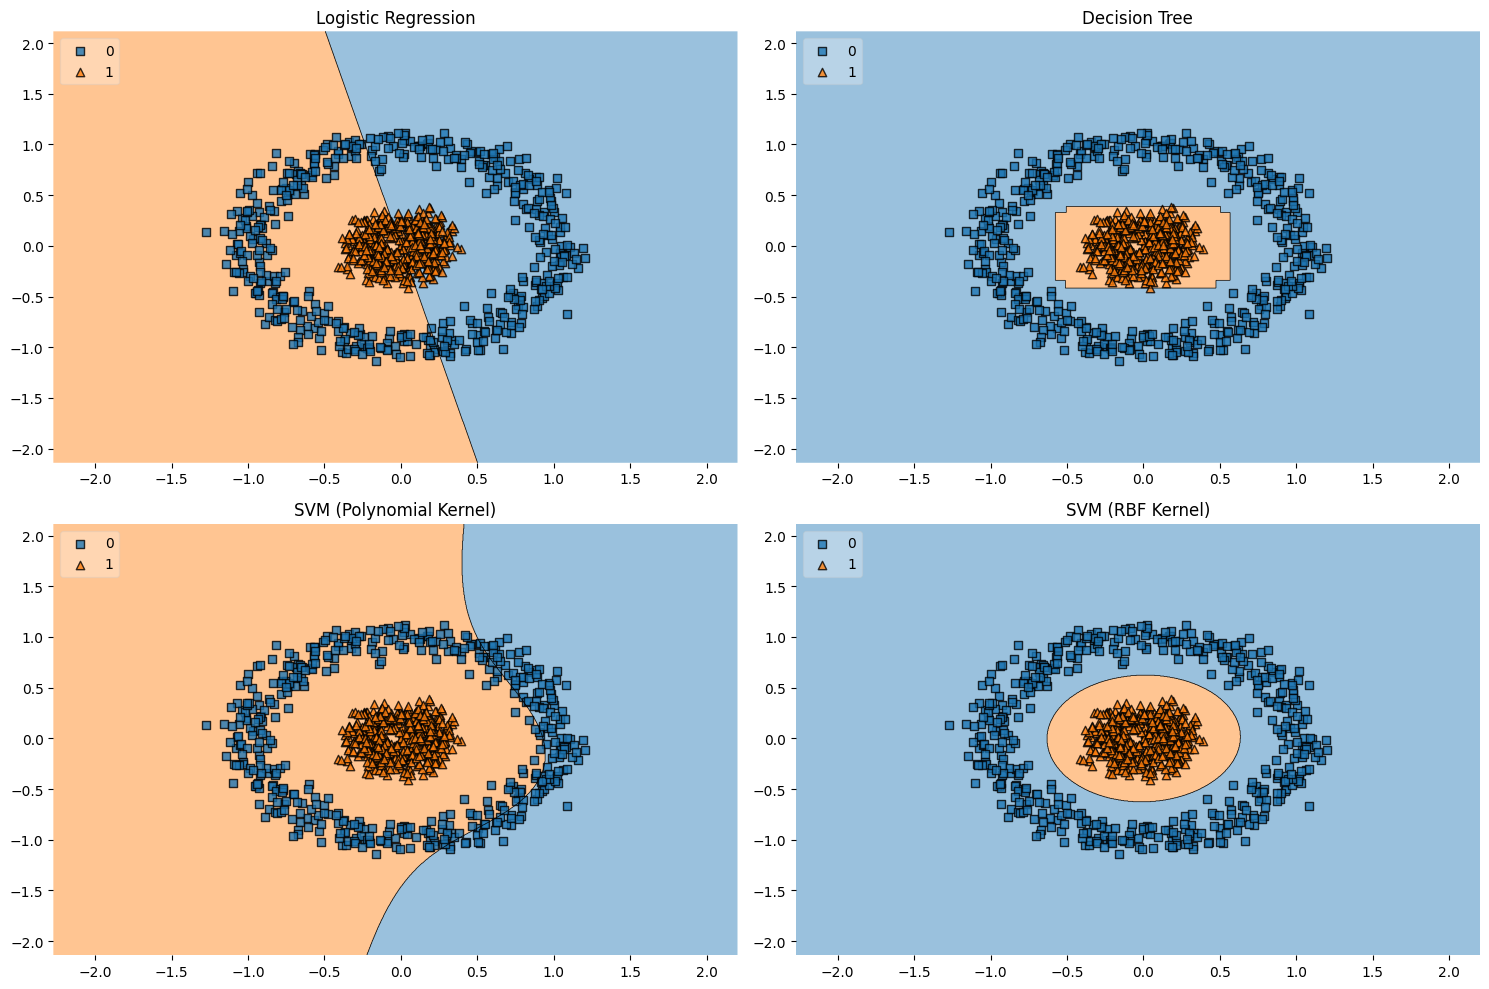

In [46]:
X, y = datasets.make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

compare_models(X,y)

## Self-practice

Using a dataset(containing more than 5000 data points) of your choice apply the following models:

1. Regression tree
2. SVM (use kernel of your choice)
3. Simple Neural Network (with two or three hidden layers)

Compare the ML models using the appropriate metrics

https://www.openml.org/search?type=data&sort=runs&id=42712&status=active

**Description**

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.

Source: Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

Attributes:

- month : month ( 1 to 12)
- hour : hour (0 to 23)
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- feel_temp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- humidity: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- count: count of total rental bikes including both casual and registered

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("hf://datasets/inria-soda/tabular-benchmark/reg_num/Bike_Sharing_Demand.csv")
df = df.sample(6250)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6250 entries, 3414 to 4285
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   month      6250 non-null   int64  
 1   hour       6250 non-null   int64  
 2   temp       6250 non-null   float64
 3   feel_temp  6250 non-null   float64
 4   humidity   6250 non-null   float64
 5   windspeed  6250 non-null   float64
 6   count      6250 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 390.6 KB


In [4]:
df.describe()

,month,hour,temp,feel_temp,humidity,windspeed,count
count,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000
mean,6.571040,11.435360,20.383494,23.798828,0.628987,12.657294,186.683520
std,3.442808,6.942306,7.911840,8.582057,0.193089,8.179413,181.029433
min,1.000000,0.000000,0.820000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,5.000000,13.940000,16.665000,0.480000,7.001500,38.000000
50%,7.000000,11.000000,20.500000,24.240000,0.630000,12.998000,138.000000
75%,10.000000,17.000000,27.060000,31.060000,0.790000,16.997900,278.000000
max,12.000000,23.000000,39.360000,49.240000,1.000000,55.998600,967.000000


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], 
                                                    random_state=42, test_size=0.2)
X_train.shape, X_test.shape 

((5000, 6), (1250, 6))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

decision_tree = DecisionTreeRegressor(random_state=42)
distributions = dict(criterion=['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                     max_depth=range(5,15),
                     min_samples_split=range(3,10),
                     min_samples_leaf=range(1,20),
                     max_leaf_nodes=range(2,30),
                     )
clf = RandomizedSearchCV(decision_tree, distributions, n_iter=1000, random_state=42, scoring='neg_mean_squared_error')
search = clf.fit(df.iloc[:,:-1], df.iloc[:,-1])
search.best_params_

/home/luzinsan/.cache/pypoetry/virtualenvs/classic-ml-scKRehVl-py3.11/lib/python3.11/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 29,
 'max_depth': 11,
 'criterion': 'friedman_mse'}

In [126]:
pd.DataFrame(search.cv_results_).sort_values('mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
284,0.005079,0.000145,0.000970,0.000087,8,5,29,11,friedman_mse,"{'min_samples_split': 8, 'min_samples_leaf': 5...",-12525.136418,-12141.252299,-12069.661027,-11774.952110,-12646.310954,-12231.462562,316.563720,1
636,0.005114,0.000163,0.001017,0.000120,6,4,29,14,squared_error,"{'min_samples_split': 6, 'min_samples_leaf': 4...",-12525.136418,-12141.252299,-12069.661027,-11774.952110,-12646.310954,-12231.462562,316.563720,1
57,0.005069,0.000147,0.000983,0.000111,3,14,28,14,squared_error,"{'min_samples_split': 3, 'min_samples_leaf': 1...",-12575.128748,-12088.660151,-11979.635287,-11795.762999,-12767.565391,-12241.350515,368.420262,3
168,0.005213,0.000170,0.001061,0.000136,5,13,28,9,friedman_mse,"{'min_samples_split': 5, 'min_samples_leaf': 1...",-12575.128748,-12166.032900,-11979.635287,-11795.762999,-12735.313584,-12250.374704,354.320781,4
131,0.005380,0.000227,0.001043,0.000109,7,1,29,11,squared_error,"{'min_samples_split': 7, 'min_samples_leaf': 1...",-12599.922992,-12189.807912,-12069.661027,-11774.952110,-12646.310954,-12256.130999,328.979105,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,0.002521,0.000119,0.000881,0.000021,7,13,2,9,friedman_mse,"{'min_samples_split': 7, 'min_samples_leaf': 1...",-23694.295315,-22131.523021,-22633.861484,-23544.297678,-24068.029703,-23214.401440,717.978159,972
757,0.153286,0.001588,0.001170,0.000022,8,15,2,14,absolute_error,"{'min_samples_split': 8, 'min_samples_leaf': 1...",-25392.711200,-23082.338400,-24050.020800,-24515.384600,-25699.064800,-24547.903960,941.880896,997
103,0.153997,0.001256,0.001268,0.000189,3,11,2,14,absolute_error,"{'min_samples_split': 3, 'min_samples_leaf': 1...",-25392.711200,-23082.338400,-24050.020800,-24515.384600,-25699.064800,-24547.903960,941.880896,997
502,0.153148,0.000700,0.001185,0.000079,8,1,2,10,absolute_error,"{'min_samples_split': 8, 'min_samples_leaf': 1...",-25392.711200,-23082.338400,-24050.020800,-24515.384600,-25699.064800,-24547.903960,941.880896,997


In [139]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [168]:
from torch import nn, optim
import torch

class SimpleANN(nn.Module):
    def __init__(self, 
                 criterion=nn.MSELoss(), 
                 optimizer=optim.SGD, optimizer_params=dict(lr=0.001, weight_decay=1e-19, momentum=0.9), 
                 epochs=10, log_step=5,
                 fc1=16, dropout1=0.5, 
                 fc2=32, dropout2=0.5):
        super(SimpleANN, self).__init__()
        
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        self.net = nn.Sequential(nn.LazyLinear(fc1), nn.LeakyReLU(), nn.Dropout(dropout1),
                                 nn.Linear(fc1, fc2), nn.BatchNorm1d(fc2), nn.LeakyReLU(), nn.Dropout(dropout2),
                                 nn.Linear(fc2, 1)
                                 )
        self.criterion, self.optimizer, self.epochs, self.log_step = \
            criterion, \
            optimizer(self.net.parameters(), **optimizer_params), \
            epochs, \
            log_step


    def forward(self, x):
        return self.net(x)
    

    def fit(self, X_train, y_train):
        # Move data, targets and weights to the specified device (CPU/GPU)
        self.net = self.net.to(self.device)
        self.net.train()  # Set model to training mode


        if isinstance(X_train, pd.DataFrame):
            X_train, y_train = \
                torch.tensor(X_train.values, dtype=torch.float32, device=self.device), \
                torch.tensor(y_train.values, dtype=torch.float32, device=self.device)
        elif isinstance(X_train, np.ndarray):
            X_train, y_train = \
                torch.tensor(X_train, dtype=torch.float32, device=self.device), \
                torch.tensor(y_train.values, dtype=torch.float32, device=self.device)
        else:
            X_train, y_train = X_train.to(self.device), y_train.to(self.device)
        
        print()
        for epoch in range(self.epochs):
            self.optimizer.zero_grad()
            outputs = self(X_train).squeeze()
            loss = self.criterion(outputs, y_train)
            loss.backward()
            self.optimizer.step()
            if epoch % self.log_step == 0:
                print(f'====> Epoch: {epoch} Average Training loss: {loss.item():.6f}')
            

    def predict(self, X_test):
        # Move data, targets and weights to the specified device (CPU/GPU)
        self.net = self.net.to(self.device)
        self.net.eval()  # Set model to predicting mode

        if isinstance(X_test, pd.DataFrame):
            X_test = torch.tensor(X_test.values, dtype=torch.float32, device=self.device)
        elif isinstance(X_test, np.ndarray):
            X_test = torch.tensor(X_test, dtype=torch.float32, device=self.device)
        else:
            X_test = X_test.to(self.device)
        
        
        with torch.no_grad():
            outputs = self(X_test).squeeze().numpy()
        return outputs

    
    def apply_init(self ,inputs):
        inputs = inputs.to(next(self.net.parameters()).device)
        self.forward(inputs)
        for module in self.net:
            if type(module) == nn.Linear:
                nn.init.xavier_uniform_(module.weight)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import itertools
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

reg1, reg2, reg3, reg4 = None, None, None, None

def compare_models():
    # Initializing regressor
    random_state = 42
    global reg1, reg2, reg3, reg4
    reg1 = DecisionTreeRegressor(random_state=random_state, criterion='friedman_mse',
                                 min_samples_split=8, min_samples_leaf=5, 
                                 max_leaf_nodes=29, max_depth=11)
    reg2 = SVR(kernel='poly', degree=3)
    reg3 = SVR(kernel='rbf', gamma='auto')
    reg4 = SimpleANN(epochs=20)


    # Regressor labels
    labels = ['Decision Tree','SVM (Polynomial Kernel)', 'SVM (RBF Kernel)', 'Simple Neural Network']

    # Loop over regressors, labels, and grid positions
    for reg, label, grd in zip([reg1, reg2, reg3, reg4],
                               labels,
                               itertools.product([0, 1], repeat=2)):
        # Fit regressor
        reg.fit(train_scaled, y_train)
        y_pred = reg.predict(test_scaled)

        print('\nModel: ', label,
              "\nMSE: ",  mean_squared_error(y_test, y_pred),
              "\nMAE: ", mean_absolute_error(y_test, y_pred),
              "\nR2-score: ", r2_score(y_test, y_pred))
    
compare_models()


Model:  Decision Tree 
MSE:  13721.369891233564 
MAE:  80.17296059812182 
R2-score:  0.5644360652051397

Model:  SVM (Polynomial Kernel) 
MSE:  20447.497713038658 
MAE:  97.11828362989424 
R2-score:  0.3509254082356531

Model:  SVM (RBF Kernel) 
MSE:  25787.699001160814 
MAE:  109.2213552326757 
R2-score:  0.1814088727811921

====> Epoch: 0 Average Training loss: 69664.054688
====> Epoch: 5 Average Training loss: 38710.007812
====> Epoch: 10 Average Training loss: 34275.628906
====> Epoch: 15 Average Training loss: 30290.300781

Model:  Simple Neural Network 
MSE:  22120.327017385087 
MAE:  107.01642707214356 
R2-score:  0.2978239963637386


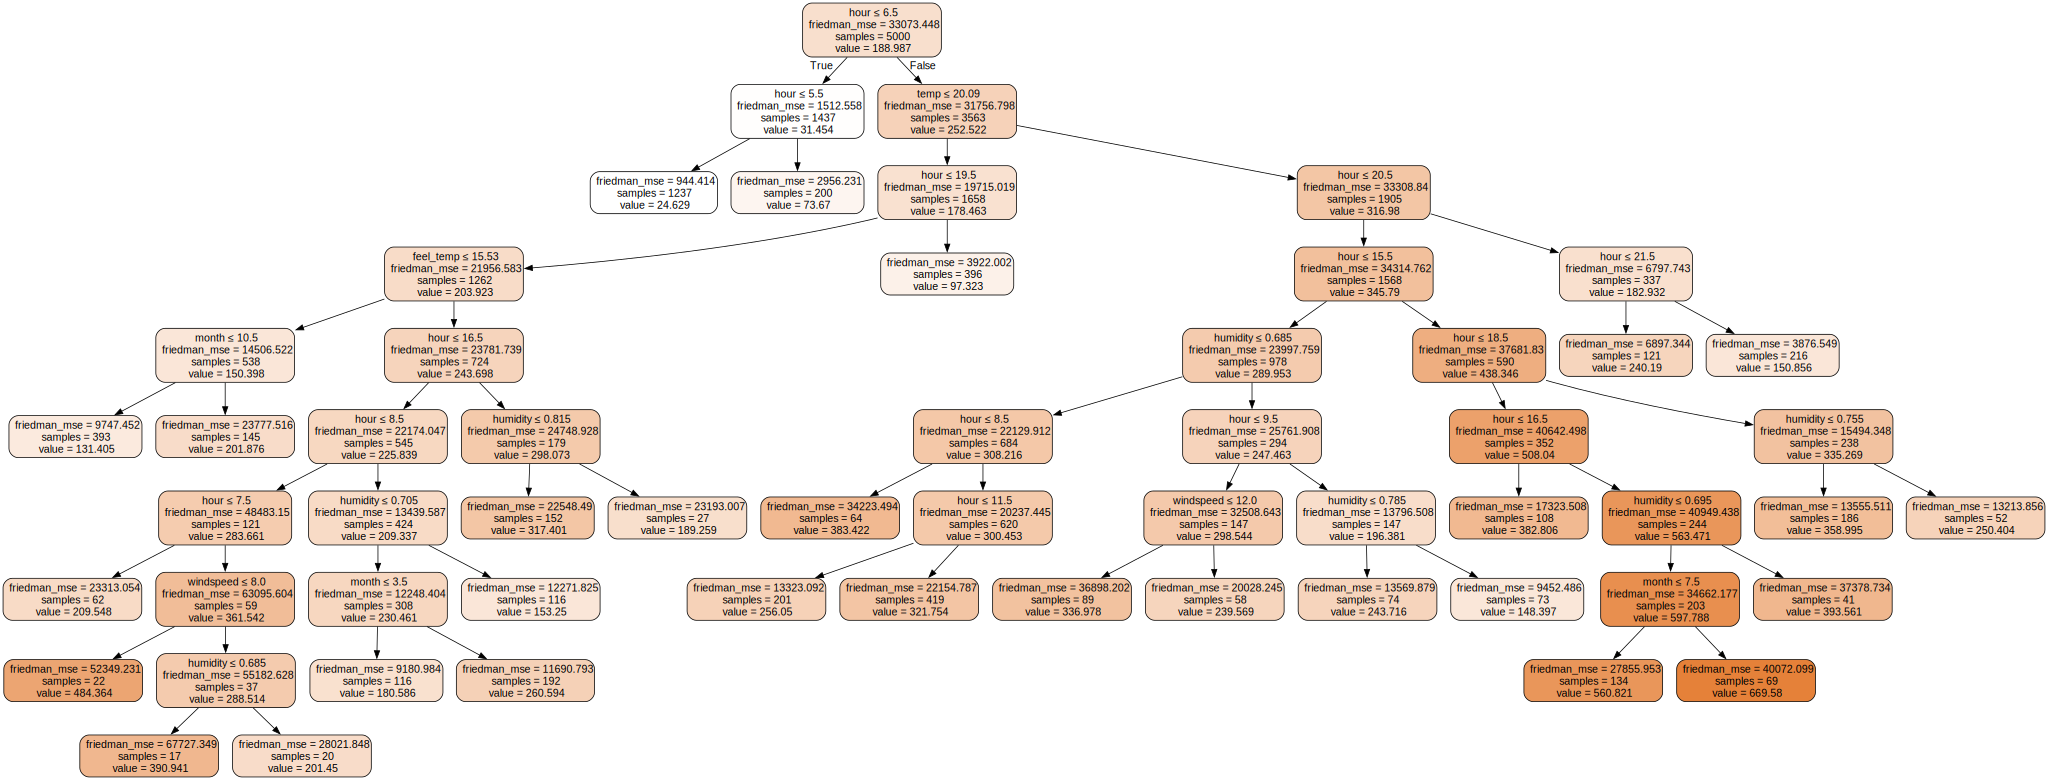

In [18]:
import graphviz
from sklearn import tree

def plot_tree(reg1):
    dot_data = tree.export_graphviz(reg1, out_file=None,
                                    feature_names=df.columns[:-1],
                                    # class_names=iris.target_names,
                                    filled=True, rounded=True,
                                    special_characters=True)
    return graphviz.Source(dot_data)

graph = plot_tree(reg1)
graph